## CREDIT CARD LOAN CLASSIFICATION USING UNDER SAMPLING

### 1. IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### 2. READING THE DATASET

In [2]:
df=pd.read_csv("F:\\DS,Courses\\Datasets\\creditcard.csv")

### 3. EXPLORING THE DATASET

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.165980e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.373150e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.086869e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.490107e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.177556e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406455e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
100*(df.Class.value_counts()/len(df))

0    99.827251
1     0.172749
Name: Class, dtype: float64

#### DISPLAYING THE COUNT OF THE LOAN CLASSES

Text(1, 1492, '492')

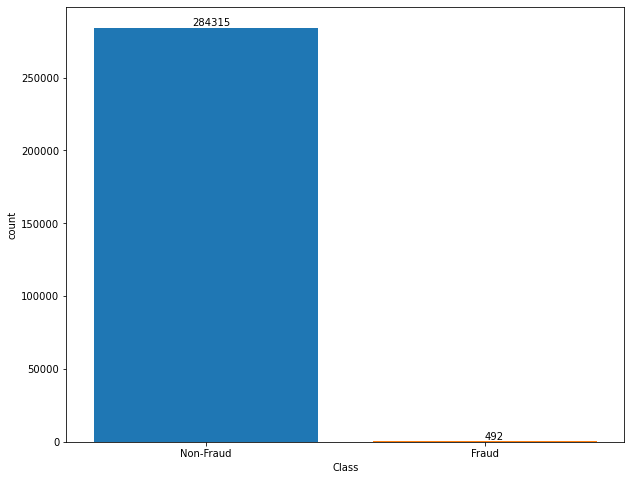

In [7]:
plt.figure(figsize=(10,8))
sb.countplot(df['Class'],saturation=5)
plt.xticks(ticks=range(2),labels=['Non-Fraud','Fraud'])
plt.text(x=-0.05,y=df.Class.value_counts()[0]+1000,s=df.Class.value_counts()[0])
plt.text(x=1,y=df.Class.value_counts()[1]+1000,s=df.Class.value_counts()[1])

### 4. UNDERSAMPLING THE DATASET

#### 4.1 IMPORTING IMBLEARN AND COUNTER

In [8]:
import imblearn
from collections import Counter

In [9]:
from imblearn.under_sampling import NearMiss

#### 4.2 DEFINING THE DATASET

In [10]:
X=df.iloc[:,:-1]
y=df['Class']

In [11]:
nm=NearMiss(version=1)

In [12]:
X_res,y_res=nm.fit_resample(X,y)

#### 4.3 SAMPLE SIZE BEFORE SAMPLING

In [13]:
Counter(y)

Counter({0: 284315, 1: 492})

#### 4.4 SAMPLE SIZE AFTER SAMPLING

In [14]:
Counter(y_res)

Counter({0: 492, 1: 492})

### 5. IMPORTING CLASSIFICATION LIBRARIES AND METRIC PARAMETERS

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,precision_score,recall_score,f1_score

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis

### 6. SPLITTING THE DATASET INTO TRAINING AND TESTING DATA  AND INITIALISING MODELS

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,train_size=0.3,random_state=101)

In [18]:
knn=KNeighborsClassifier(n_neighbors=2)
lr=LogisticRegression()
ridge=RidgeClassifier()
etc=ExtraTreesClassifier()
abc=AdaBoostClassifier()
bc=BaggingClassifier()
gbc=GradientBoostingClassifier()
lda=LinearDiscriminantAnalysis()
qda=QuadraticDiscriminantAnalysis()
rfc=RandomForestClassifier()
svc=SVC(kernel='rbf',C=10,gamma=0.0001)
dtc=DecisionTreeClassifier()

In [19]:
models=[knn,lr,ridge,etc,abc,bc,gbc,lda,qda,rfc,svc,dtc]
names=[x.__class__.__name__ for x in models]

### 7. TRAINING THE MODEL AND PREDICTING THE CLASSES

In [20]:
predictions=[]
for m in models:
    m.fit(X_train,y_train)
    predictions.append(m.predict(X_test))

#### 7.1 DISPLAYING THE CLASSIFICATION REPORT AND CONFUSION MATRICES

In [21]:
accuracy=[]
precision=[]
recall=[]
f1=[]
for name,y_pred in zip(names,predictions):
    print(f"\n Classification Report for {name}: \n",classification_report(y_test,y_pred,target_names=['Non-Fraudulent','Fradulent']))
    print(f"\n Confusion Matrix for {name}: \n",confusion_matrix(y_test,y_pred))
    print(f"\n Accuracy Score for {name}: \n",accuracy_score(y_test,y_pred))
    print(f"\n Precision Score for {name}: \n",precision_score(y_test,y_pred))
    print(f"\n Recall Score for {name}: \n",recall_score(y_test,y_pred))
    print(f"\n F1 Score for {name}: \n",f1_score(y_test,y_pred))

    accuracy.append(accuracy_score(y_test,y_pred))
    precision.append(precision_score(y_test,y_pred))
    recall.append(recall_score(y_test,y_pred))
    f1.append(f1_score(y_test,y_pred))
    print('\n','*'*100)


 Classification Report for KNeighborsClassifier: 
                 precision    recall  f1-score   support

Non-Fraudulent       0.87      0.99      0.92       352
     Fradulent       0.98      0.85      0.91       337

      accuracy                           0.92       689
     macro avg       0.93      0.92      0.92       689
  weighted avg       0.92      0.92      0.92       689


 Confusion Matrix for KNeighborsClassifier: 
 [[347   5]
 [ 52 285]]

 Accuracy Score for KNeighborsClassifier: 
 0.9172714078374455

 Precision Score for KNeighborsClassifier: 
 0.9827586206896551

 Recall Score for KNeighborsClassifier: 
 0.8456973293768546

 F1 Score for KNeighborsClassifier: 
 0.9090909090909091

 ****************************************************************************************************

 Classification Report for LogisticRegression: 
                 precision    recall  f1-score   support

Non-Fraudulent       0.95      0.93      0.94       352
     Fradulent       0.9


 Recall Score for SVC: 
 0.9525222551928784

 F1 Score for SVC: 
 0.9683257918552036

 ****************************************************************************************************

 Classification Report for DecisionTreeClassifier: 
                 precision    recall  f1-score   support

Non-Fraudulent       0.94      0.90      0.92       352
     Fradulent       0.90      0.94      0.92       337

      accuracy                           0.92       689
     macro avg       0.92      0.92      0.92       689
  weighted avg       0.92      0.92      0.92       689


 Confusion Matrix for DecisionTreeClassifier: 
 [[317  35]
 [ 20 317]]

 Accuracy Score for DecisionTreeClassifier: 
 0.9201741654571843

 Precision Score for DecisionTreeClassifier: 
 0.9005681818181818

 Recall Score for DecisionTreeClassifier: 
 0.9406528189910979

 F1 Score for DecisionTreeClassifier: 
 0.9201741654571842

 ***************************************************************************************

#### 7.1 CREATING A DATAFRAME FOR SCORES AND DISPLAYING IT

In [22]:
scores=round(pd.DataFrame([accuracy,precision,recall,f1],index=['Accuracy','Precision','Recall','F1'],columns=names).transpose(),2)*100

In [23]:
scores

,Accuracy,Precision,Recall,F1
KNeighborsClassifier,92.0,98.0,85.0,91.0
LogisticRegression,94.0,93.0,95.0,94.0
RidgeClassifier,92.0,99.0,86.0,92.0
ExtraTreesClassifier,96.0,97.0,94.0,95.0
AdaBoostClassifier,93.0,91.0,95.0,93.0
BaggingClassifier,94.0,94.0,94.0,94.0
GradientBoostingClassifier,94.0,94.0,94.0,94.0
LinearDiscriminantAnalysis,92.0,99.0,85.0,92.0
QuadraticDiscriminantAnalysis,90.0,87.0,95.0,90.0
RandomForestClassifier,95.0,95.0,94.0,95.0


#### 7.2 CREATING A DATAFRAME FOR PREDICTIONS AND DISPLAYING IT

In [24]:
y_pred=pd.DataFrame({i:j for i,j in zip(names,predictions)})

In [25]:
y_pred

,KNeighborsClassifier,LogisticRegression,RidgeClassifier,ExtraTreesClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier,LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis,RandomForestClassifier,SVC,DecisionTreeClassifier
0,1,1,1,1,1,1,1,1,1,1,1,1
1,1,1,0,1,1,1,1,0,0,1,1,1
2,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
684,0,0,0,0,0,0,0,0,0,0,0,0
685,0,1,1,1,1,1,1,1,1,1,1,1
686,0,0,0,0,0,0,0,0,0,0,0,0
687,1,1,1,1,1,1,1,1,1,1,1,1


### 8. DISPLAYING THE CONFUSION MATRICES AS HEATMAPS

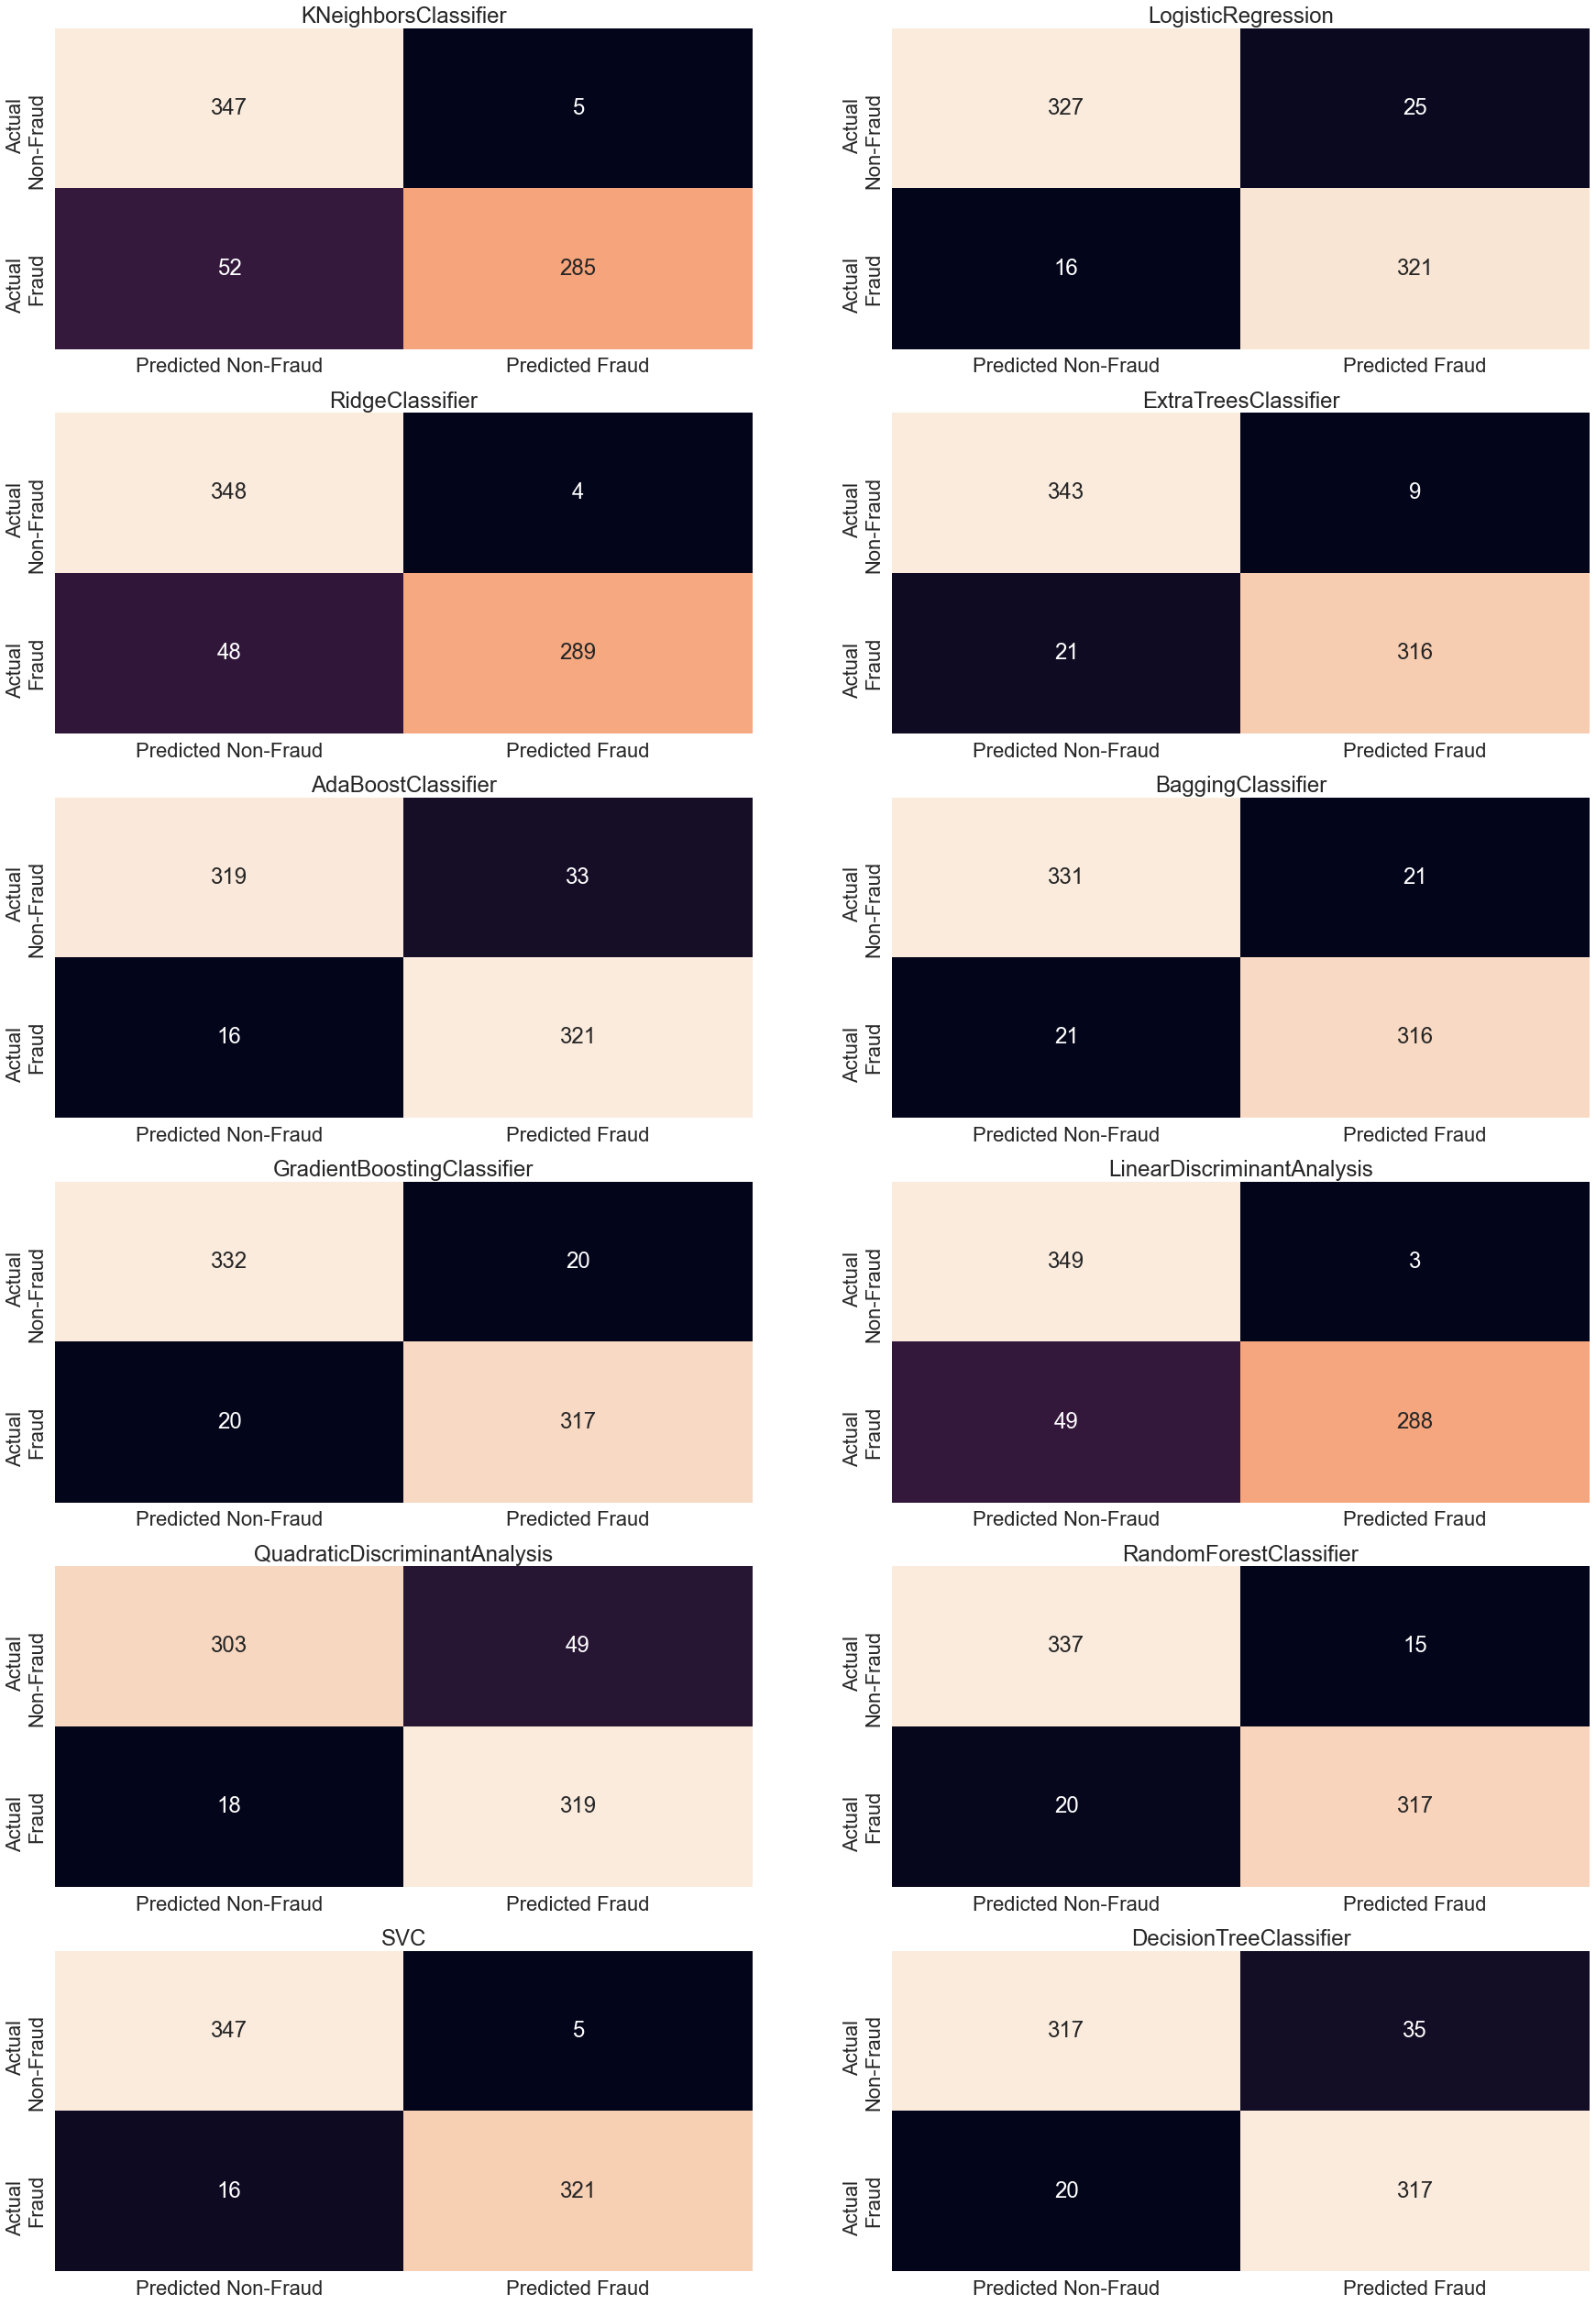

In [26]:
sb.set(font_scale=2)
plt.figure(figsize=(30,45))
for num,i in enumerate(names):
    plt.subplot(6,2,num+1)
    sb.heatmap(pd.DataFrame(confusion_matrix(y_test,y_pred[i]),columns=['Predicted Non-Fraud','Predicted Fraud'],index=['Actual \nNon-Fraud','Actual \nFraud']),annot=True,cbar=False,fmt='1g').set_title(i)

### 9.DISPLAYING THE CLASSIFICATION METRICS OF EACH MODEL

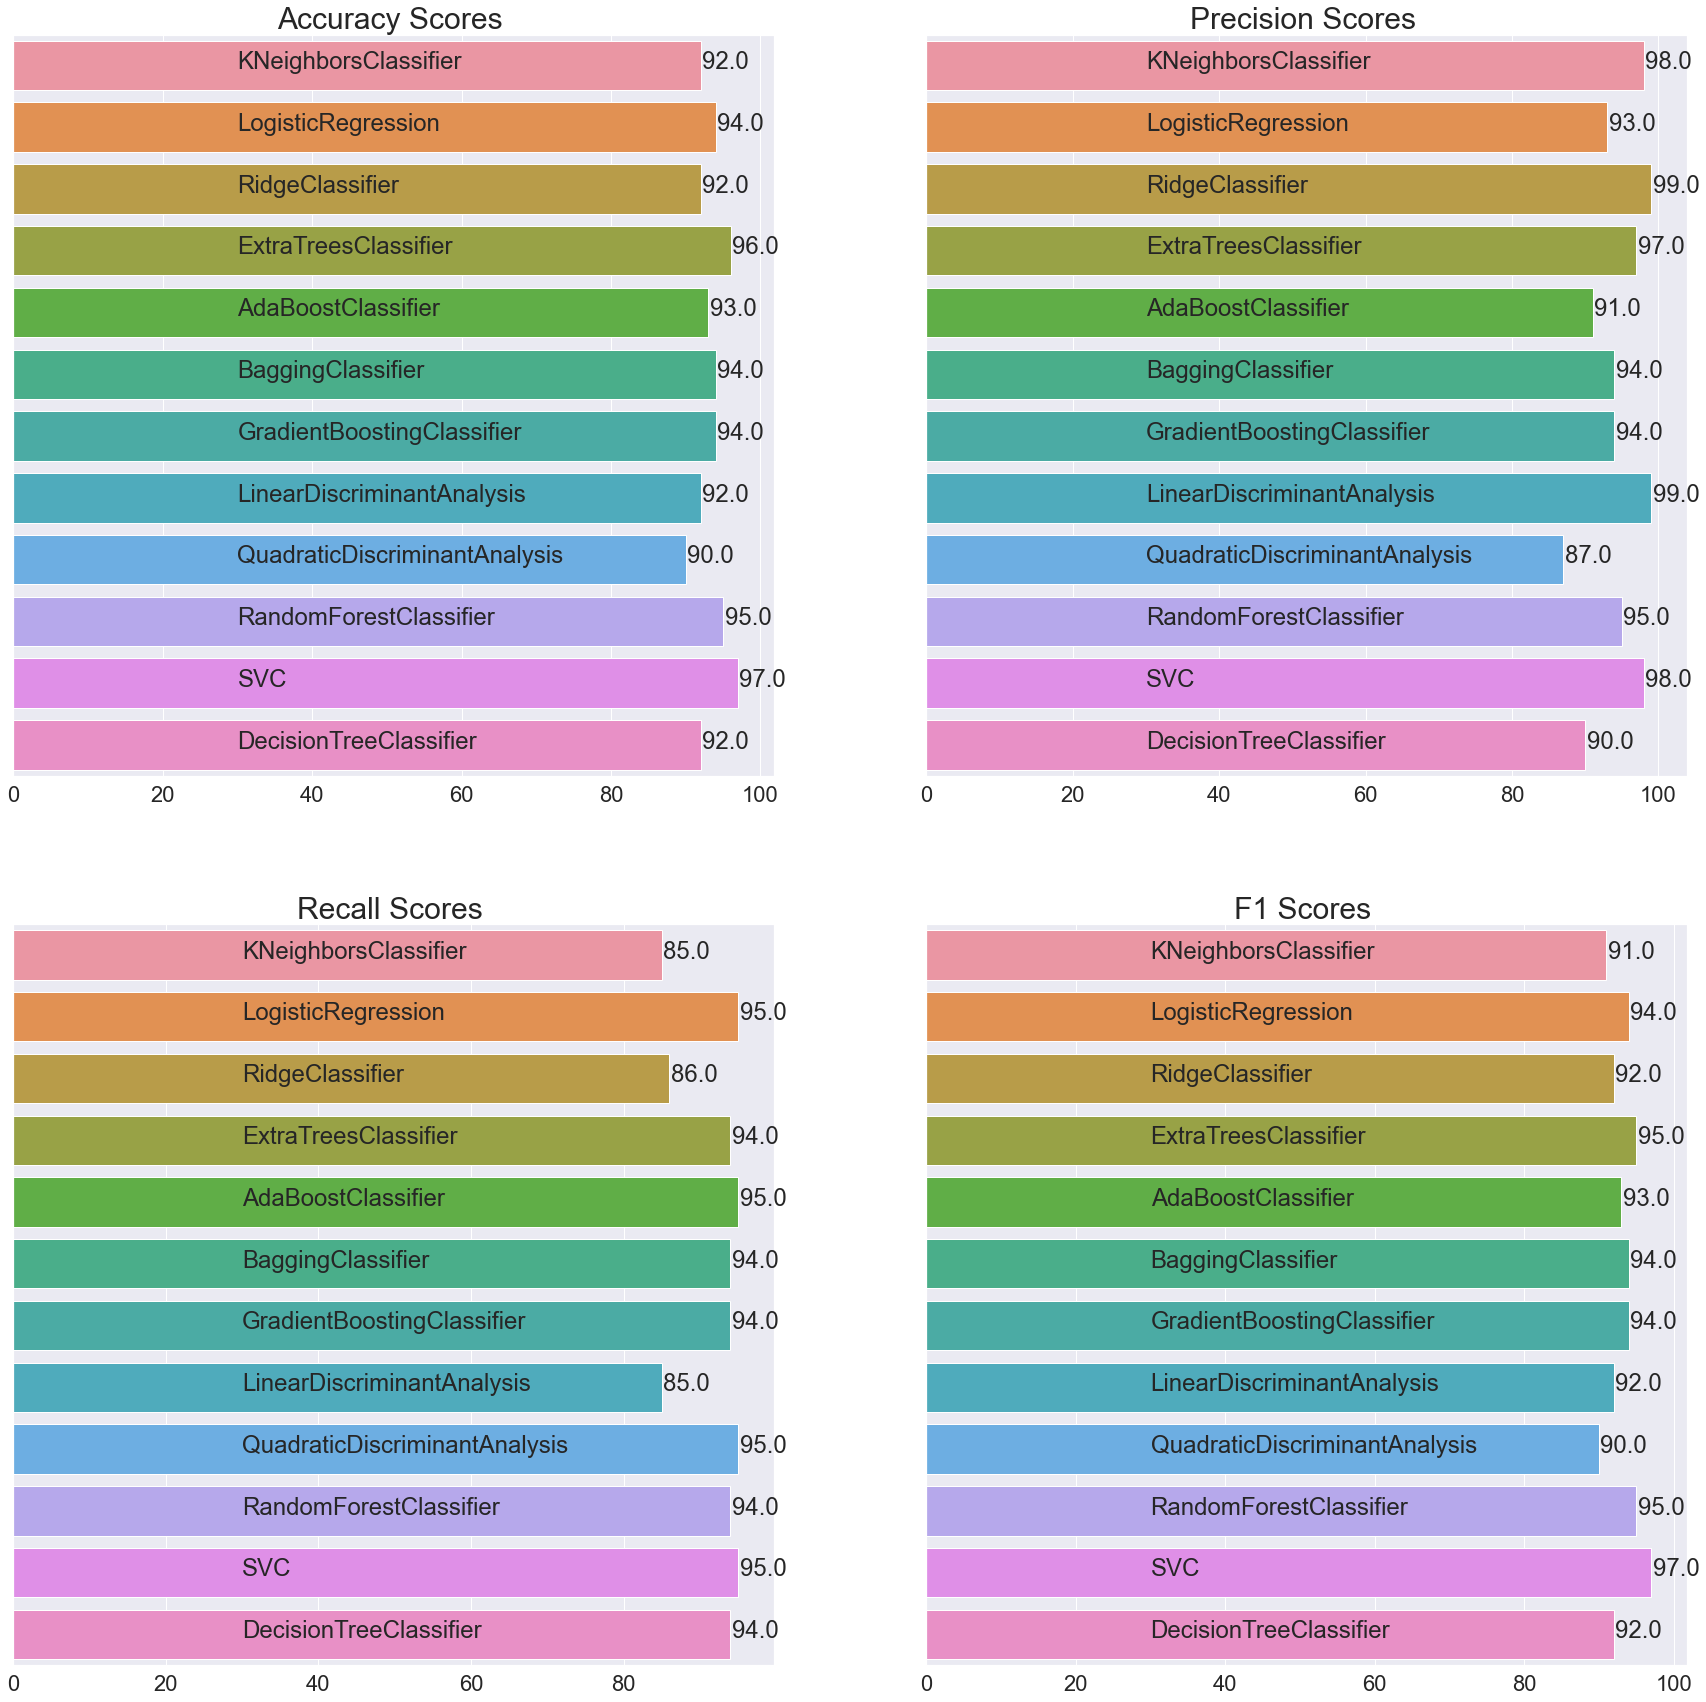

In [27]:
plt.figure(figsize=(30,30))
sb.set(font_scale=2)
sb.set_style('darkgrid')
for num,i in enumerate(scores.columns):
    plt.subplot(2,2,num+1)
    sb.barplot(x=scores[i],y=scores.index)
    plt.yticks([])
    plt.xlabel('')
    plt.title(i+" Scores ",fontsize=30)
    for j in range(len(names)):
        plt.text(x=scores[i][j]+0.2,y=j+0.05,s=scores[i][j])
        plt.text(x=30,y=j+0.05,s=scores.index[j])

### 10. DISPLAYING THE DECISION TREE

In [28]:
from sklearn import tree

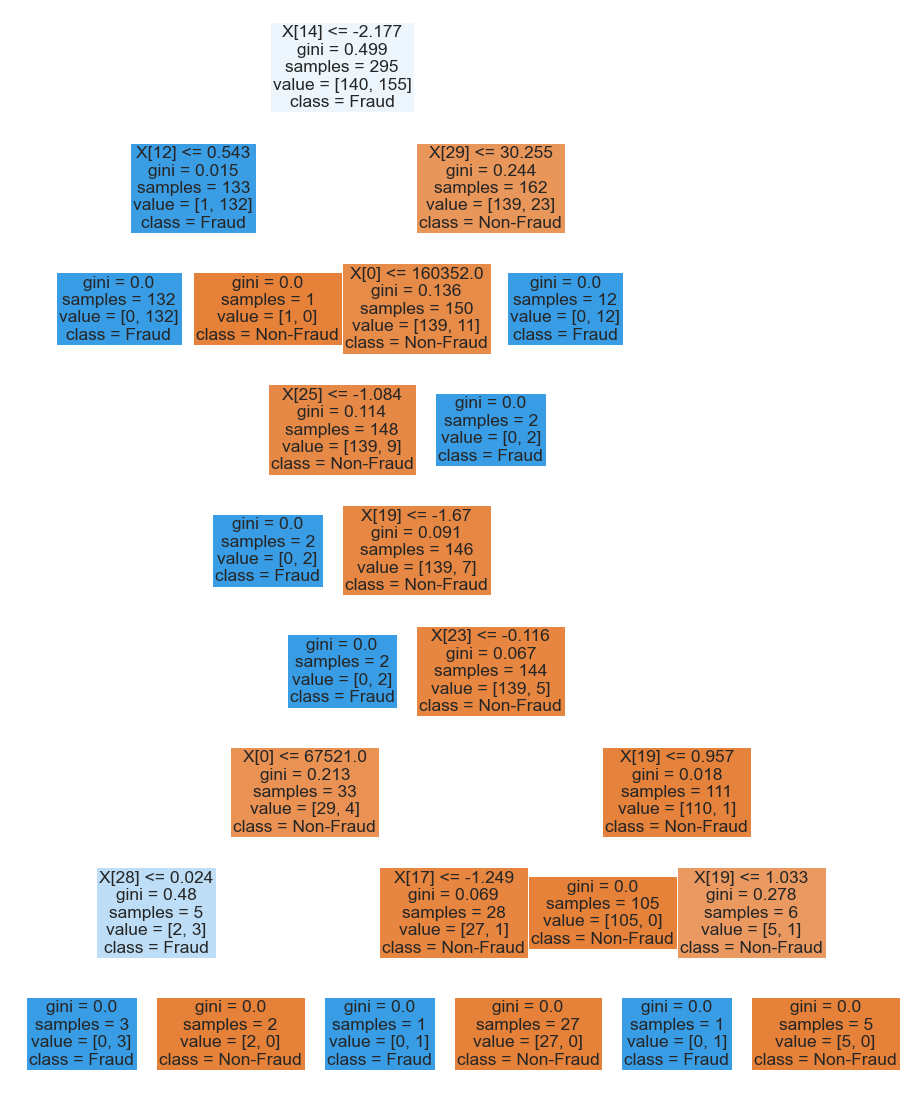

In [29]:
fig = plt.figure(figsize=(16,20))
_=tree.plot_tree(dtc, filled=True,class_names=['Non-Fraud','Fraud'])